In [374]:
import tensorflow as tf
import scipy.stats as st
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

# Cerebros líquidos, CFD, LCA notebook.
## Preparación de terreno

In [23]:
a = [1, 0, 26.9, 2.8, 166.32, 62.3]
b = tf.math.argmin(input = a)
c = tf.keras.backend.eval(b)

In [25]:
#From https://stackoverflow.com/users/4527807/teddy-hartanto answer
from scipy import signal

def gkern(kernlen=21, std1=3,std2=3):
    """Returns a 2D Gaussian kernel array."""
    gkern1d1= signal.gaussian(kernlen, std=std1).reshape(kernlen, 1)
    gkern1d2= signal.gaussian(kernlen, std=std2).reshape(kernlen, 1)


    #print(gkern1d)
    gkern2d = np.outer(gkern1d1, gkern1d2)
    return gkern2d

In [55]:
def f(res,std1,std2):
    life_map=np.zeros((res+20,res+20))
    slicer=(slice(20,20+res,1),slice(20,20+res,1))
    life_map[slicer]=-gkern(res,std1,std2)
    sns.heatmap(life_map,cmap='inferno',cbar=False)
    return (res,std1,std2)
w=interact(f, res=IntSlider(min=1, max=30, step=1, value=10,continuous_update=False),std1=IntSlider(min=1, max=30, step=1, value=3,continuous_update=False),std2=IntSlider(min=1, max=30, step=1, value=3,continuous_update=False));

interactive(children=(IntSlider(value=10, continuous_update=False, description='res', max=30, min=1), IntSlide…

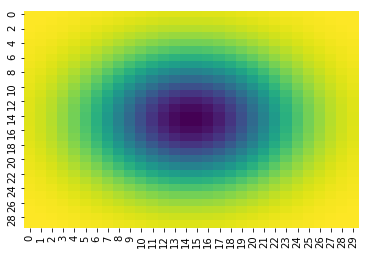

In [413]:
(res,std1,std2)=w.widget.result
#life_map=np.zeros((res+20,res+20))
#slicer=(slice(20,20+res,1),slice(20,20+res,1))
#life_map[slicer]=-gkern(res,std1,std2)
life_map=-gkern(res,std1,std2)

sns.heatmap(life_map,cmap='viridis',cbar=False)

## Listado de agentes
Cada tupla de la lista es la posición de un agente.

In [414]:
agents=[(26,1),(2,28),(1,1)]
images=[]


### Generar un paso de la simulación

0
1
2


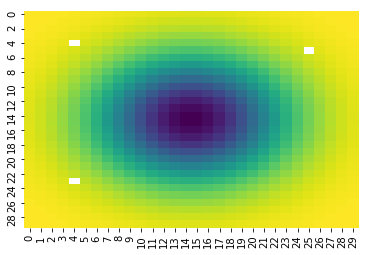

In [419]:
render=np.copy(life_map)
for ida,agent in enumerate(agents):
    print (ida)
    
    render[agent]=np.nan
    kernel=(slice(agent[0]-1,agent[0]+2,1),slice(agent[1]-1,agent[1]+2,1))
    idx=np.argmin(life_map[kernel])
    (i,j)=np.unravel_index(idx, (3,3))
    agents[ida]=(agent[0]+i-1,agent[1]+j-1)
    if (i==1 and j==1):
        agents.remove(agent)
        life_map[agent]=np.nan
fig, ax = plt.subplots()
sns.heatmap(render,cmap='viridis',cbar=False,axes=ax)


### Mostrar el mapa

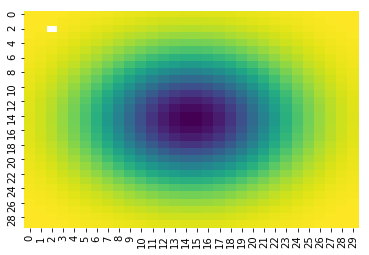

In [417]:
fig, ax = plt.subplots()
sns.heatmap(render,cmap='viridis',cbar=False,axes=ax)

# Generar simulación

AttributeError: Unknown property title

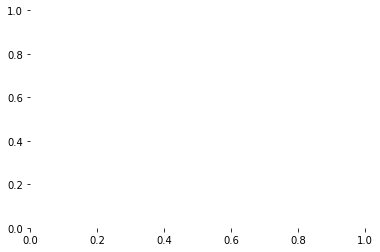

In [428]:
life_map=-gkern(res,std1,std2)
agents=[(26,1),(2,28),(1,1)]
images=[]
os.remove('life.gif')
for frame in range(20):
    render=np.copy(life_map)
    for ida,agent in enumerate(agents):
        render[agent]=np.nan
        kernel=(slice(agent[0]-1,agent[0]+2,1),slice(agent[1]-1,agent[1]+2,1))
        idx=np.argmin(life_map[kernel])
        (i,j)=np.unravel_index(idx, (3,3))
        agents[ida]=(agent[0]+i-1,agent[1]+j-1)
        if (i==1 and j==1):
            agents.remove(agent)
            life_map[agent]=np.nan
    fig, ax = plt.subplots()
    ax.set_title('lalala')
    sns.heatmap(render,cmap='viridis',cbar=False,axes=ax,title=frame)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('life.gif', images, fps=3)

### Show gif from simulation
![SegmentLocal](life.gif "segment")